In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [164]:
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [3]:
app_df = pd.read_csv(r'E:\Download\application_data.csv')

In [10]:
pre_df = pd.read_csv(r'C:\Users\Archi\Downloads\previous_application.csv')

i will work on application data set only because i have cleaned previous dataset in excel because that data set was small.

In [ ]:
#APPLICATION

In [8]:
app_df.shape

(307511, 122)

In [15]:
pre_df.shape

(1048575, 22)

In [6]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1048575 non-null  int64  
 1   SK_ID_CURR              1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE      1048575 non-null  object 
 3   AMT_ANNUITY             815566 non-null   float64
 4   AMT_APPLICATION         1048575 non-null  float64
 5   AMT_CREDIT              1048575 non-null  float64
 6   AMT_GOODS_PRICE         807610 non-null   float64
 7   NAME_CASH_LOAN_PURPOSE  1048575 non-null  object 
 8   NAME_CONTRACT_STATUS    1048575 non-null  object 
 9   DAYS_DECISION           1048575 non-null  int64  
 10  NAME_PAYMENT_TYPE       1048575 non-null  object 
 11  CODE_REJECT_REASON      1048575 non-null  object 
 12  NAME_CLIENT_TYPE        1048575 non-null  object 
 13  NAME_GOODS_CATEGORY     1048575 non-null  object 
 14  NA

In [14]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [13]:
app_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#  Application Data Cleaning 

In [17]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [21]:
#checking for % of null values in each columns

round(app_df.isnull().sum()/app_df.shape[0]*100,2)


SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

INSIGHT : here i am not able to see all coulumns, but there is many columns which has more than 40% of null values  

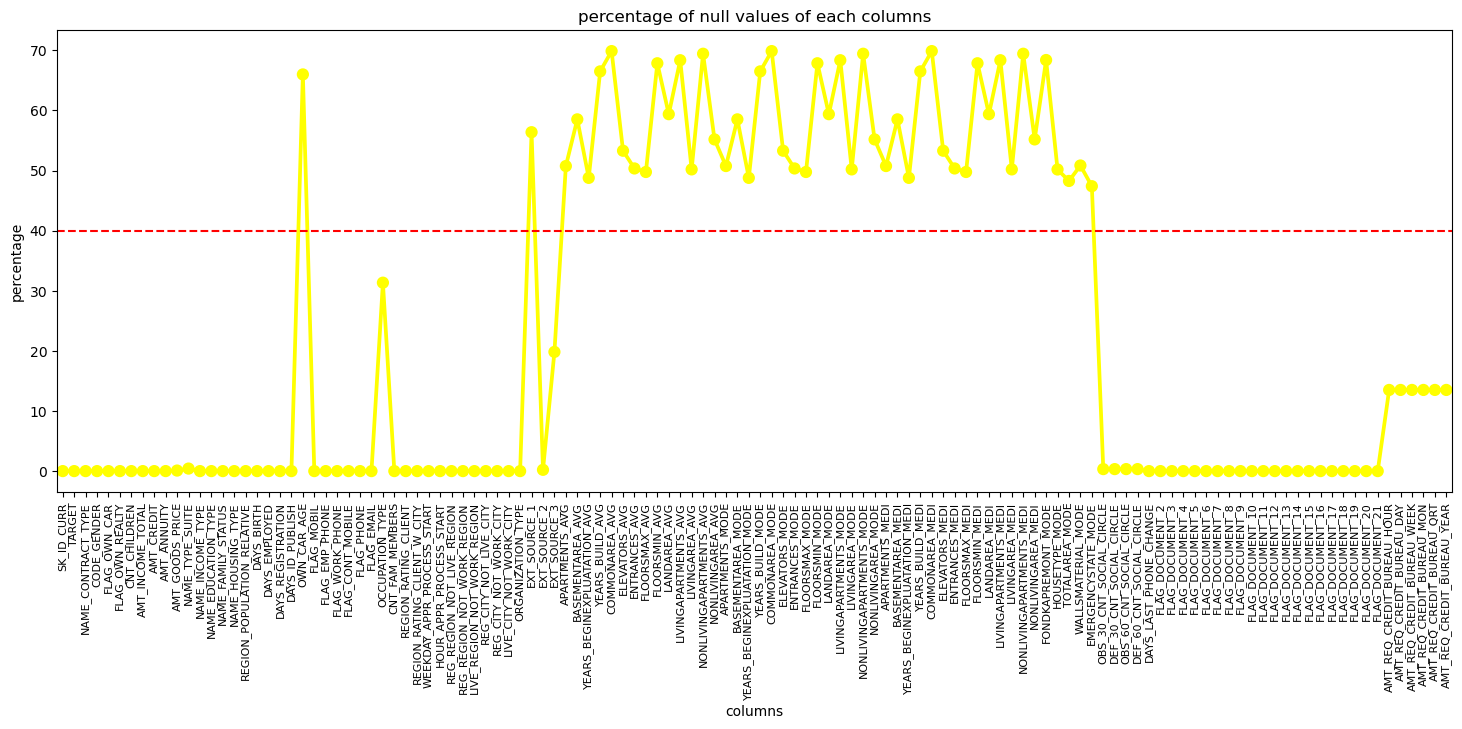

In [11]:
#let check null columns from graph 

null_app_df = pd.DataFrame((app_df.isnull().sum())*100/app_df.shape[0]).reset_index()
null_app_df.columns=['columns','% of null values']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x='columns',y='% of null values',data=null_app_df,color='yellow')
plt.xticks(rotation = 90 , fontsize= 8)
ax.axhline(40, ls='--',color='red')
plt.title('percentage of null values of each columns')
plt.ylabel('percentage')
plt.xlabel('columns')
plt.show()

Insight:
From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the
columns which have less than 40 % null values below the red line. Lets check the columns which has more than 40% missing 
values

In [12]:
null_40_app_df =null_app_df[null_app_df['% of null values'] >=40]
null_40_app_df

,columns,% of null values
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [13]:
  len(null_40_app_df)

49

Insight:
Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant

In [ ]:
Similarly i can delete previous application dataset null value columns. and there i deleted 11 columns which have more then 40% 
null values.

# Analyze & Delete Unnecessary Columns in applicationDF

In [ ]:
 Let's work on  External Sources
EXT_SOURCE_1: Normalized score from external data source
EXT_SOURCE_2: Normalized score from external data source
EXT_SOURCE_3: Normalized score from external data source


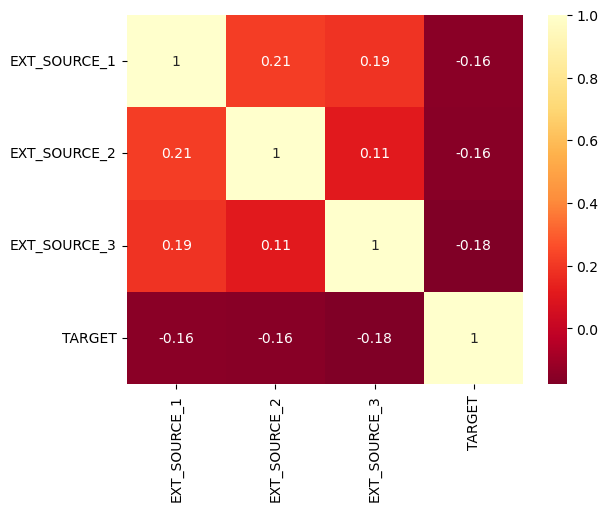

In [14]:
#Checking correlation of EXT_SOURCE_X columns vs TARGET column

Source = app_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap = 'YlOrRd_r')

Insight:
Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [15]:
# create a list of columns that needs to be dropped including the columns with >40% null values
unwanted_columns = null_40_app_df['columns'].tolist()+['EXT_SOURCE_2','EXT_SOURCE_3']
len(unwanted_columns)

#As EXT_SOURCE_1 is already included in null_40_app_df columns

51

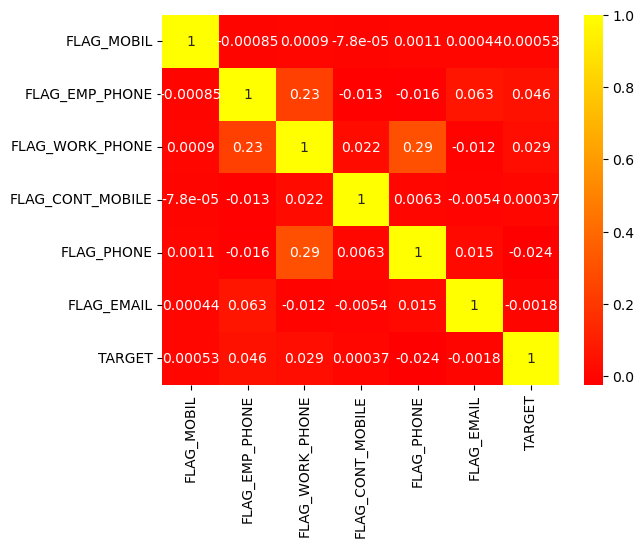

In [61]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating

contacts=app_df[["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","TARGET"]]

source_corr1=contacts.corr()
ax= sns.heatmap(source_corr1,annot=True,cbar=True,cmap='autumn',
               xticklabels=source_corr1.columns,
               yticklabels=source_corr1.columns)

Insight:
There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [16]:
#including the 6 FLAG columns to be deleted,
 

unwanted_columns = unwanted_columns+["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE",
                                     "FLAG_EMAIL"] 
len(unwanted_columns)
 

 
 

57

C:\Users\Archi\AppData\Local\Temp\ipykernel_8624\3062183883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag.loc[df_flag["TARGET"] == 1, "TARGET"] = "Defaulter"
C:\Users\Archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

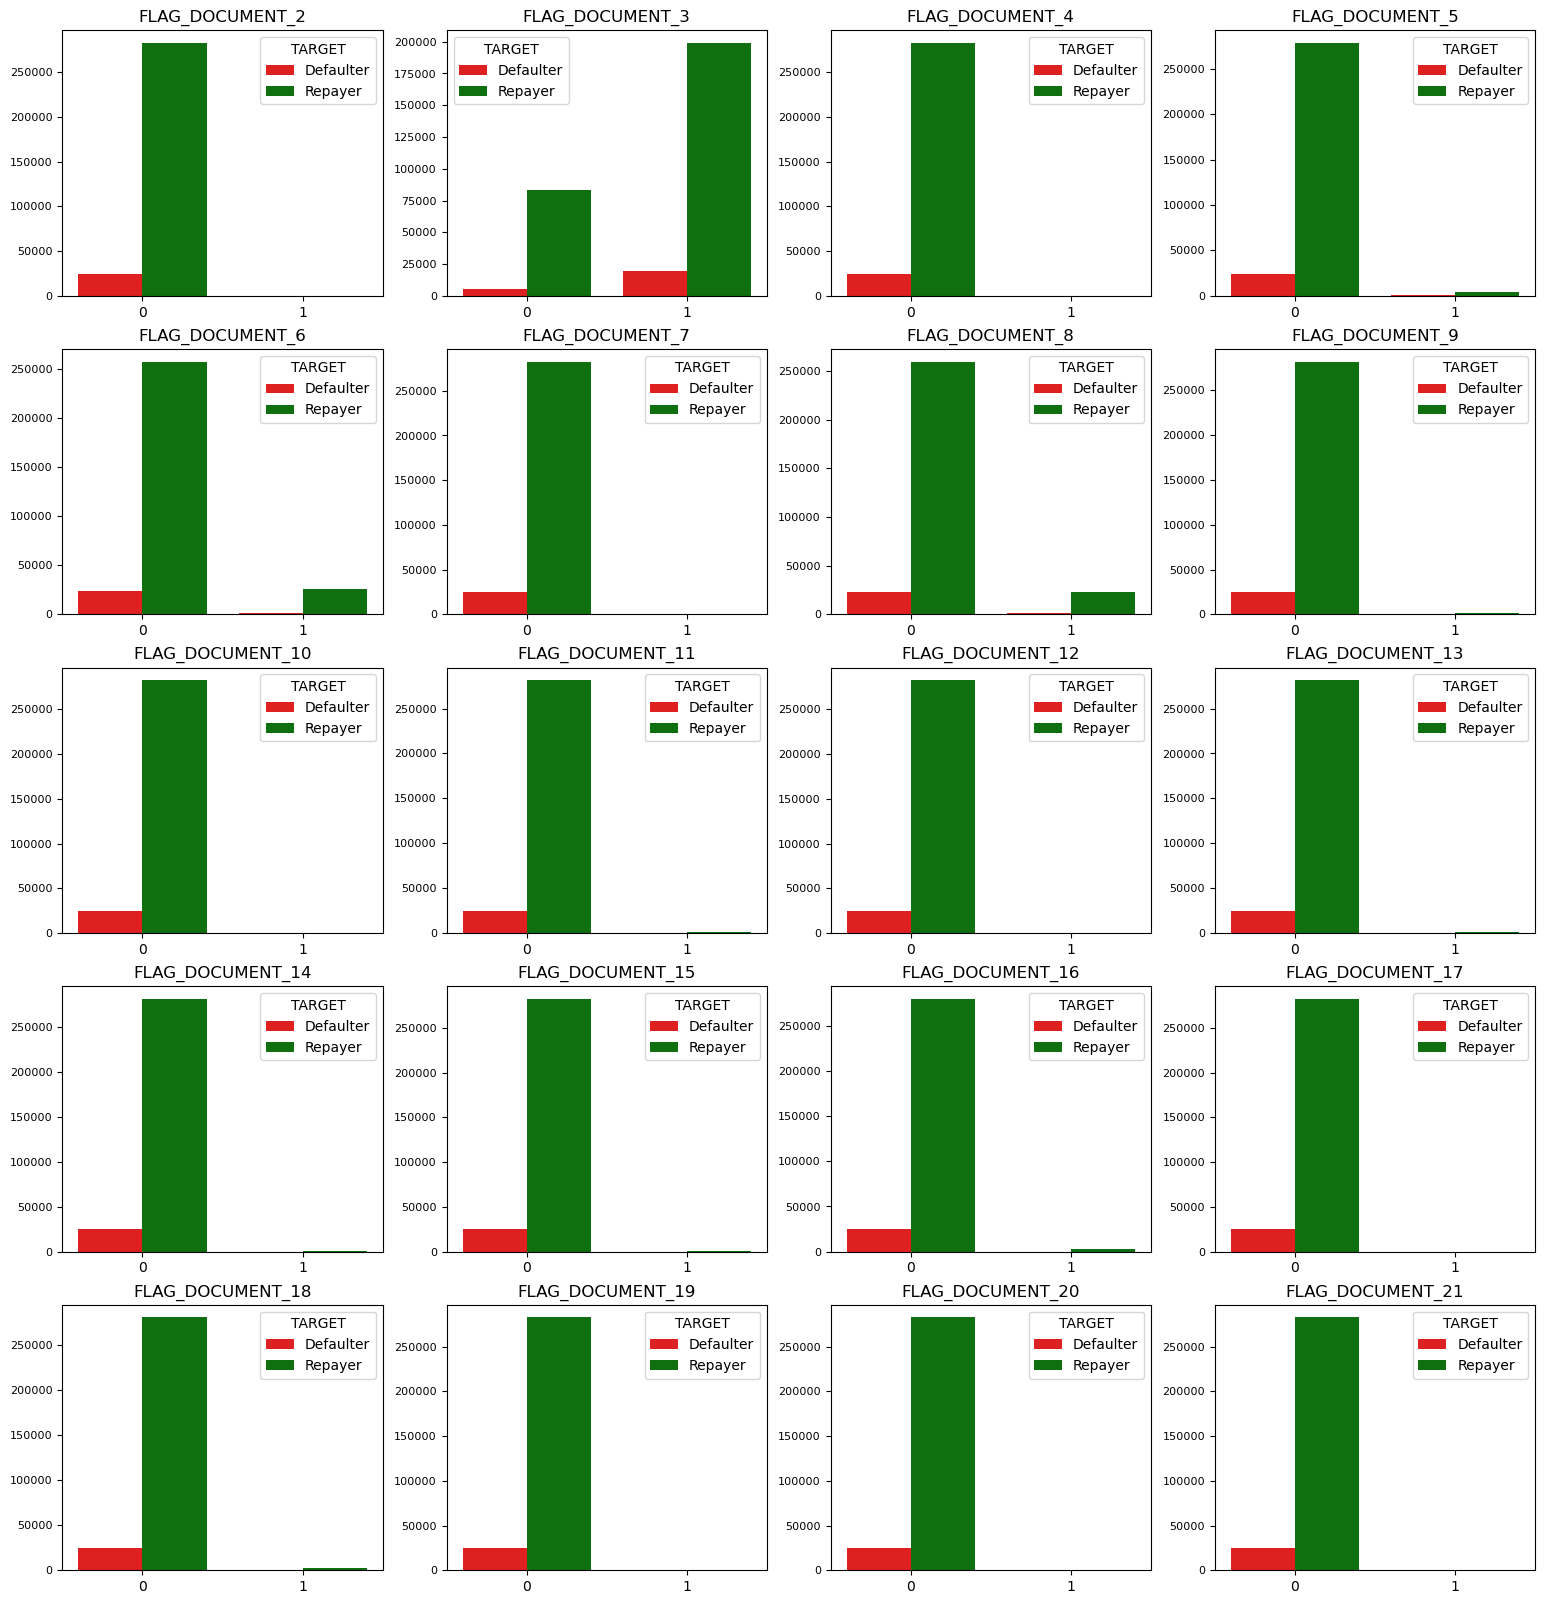

In [30]:
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag =  app_df[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(19,20))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    
plt.show()    



Insight:
The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [31]:
col_Doc.remove('FLAG_DOCUMENT_3')

In [33]:
# Including the flag documents for dropping the Document columns

unwanted_columns = unwanted_columns + col_Doc
len(unwanted_columns)

76

Insight:
Total 76 columns can be deleted from applicationD

In [36]:
#Dropping the unnecessary columns from applicationDF

app_df.drop(labels=unwanted_columns,axis=1,inplace=True)

In [37]:
app_df.shape

(307511, 46)

In [38]:
pre_df.shape

(1048575, 22)

In [39]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [42]:
pd.set_option('display.max_columns', None)

#write this code because i wanted to see all the columns for furthur analysis.

In [43]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Converting Negative days to positive days

columns_to_convert = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

# Use the abs() function to convert negative values to positive
app_df[columns_to_convert] = app_df[columns_to_convert].abs()

# Display the DataFrame with negative values converted to positive
app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.0,0.0,0.0,0.0,-273.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,20775,365243,4388.0,4090,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,14966,7921,6737.0,5150,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,6.0,0.0,6.0,0.0,-1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,11961,4786,2562.0,931,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-322.0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Creating bins for income amount

app_df['AMT_INCOME_TOTAL']=app_df['AMT_INCOME_TOTAL']/100000

amt_bins = [1,2,3,4,5,6,7,8,9,10,11]
amt_labels = ['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','600k-700k',
             '700k-800k','800k-900k','900k-1M','1M-above']

app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins=amt_bins, labels=amt_labels)

percentage=app_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

app_df
percentage

0-100k       64.002529
100k-200k    26.757424
200k-300k     6.025100
300k-400k     2.200911
400k-500k     0.449542
600k-700k     0.356760
800k-900k     0.122341
700k-800k     0.066508
900k-1M       0.011495
1M-above      0.007390
Name: AMT_INCOME_RANGE, dtype: float64

Insight:
More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [57]:
# Creating bins for amount credit range

app_df['AMT_CREDIT']= app_df['AMT_CREDIT']/100000

bins = [1,2,3,4,5,6,7,8,9,10,11,12]
credit_labels=['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_df['AMT_CREDIT_RANGE'] =pd.cut(app_df['AMT_CREDIT'],bins , labels =credit_labels)

percentage = app_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

app_df
percentage

100K-200K    20.030477
400k-500k    12.509501
300k-400k    11.707741
0-100K       11.014150
200k-300k     9.624773
500k-600k     8.788297
700k-800k     7.963515
600k-700k     7.013755
900k-1M       4.904841
800k-900k     3.262220
1M Above      3.180729
Name: AMT_CREDIT_RANGE, dtype: float64

Insight:
More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [59]:
app_df['AGE'] = app_df['DAYS_BIRTH']/365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

app_df['AGE_GROUP']=pd.cut(app_df['AGE'],bins=bins,labels=slots)

percentage= app_df['AGE_GROUP'].value_counts(normalize=True)*100

app_df
percentage

50 above    33.703185
30-40       26.765872
40-50       24.890492
20-30       14.640452
0-20         0.000000
Name: AGE_GROUP, dtype: float64

Insight:
31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

# OUTLIERS  

Finding outlier information in app_df 

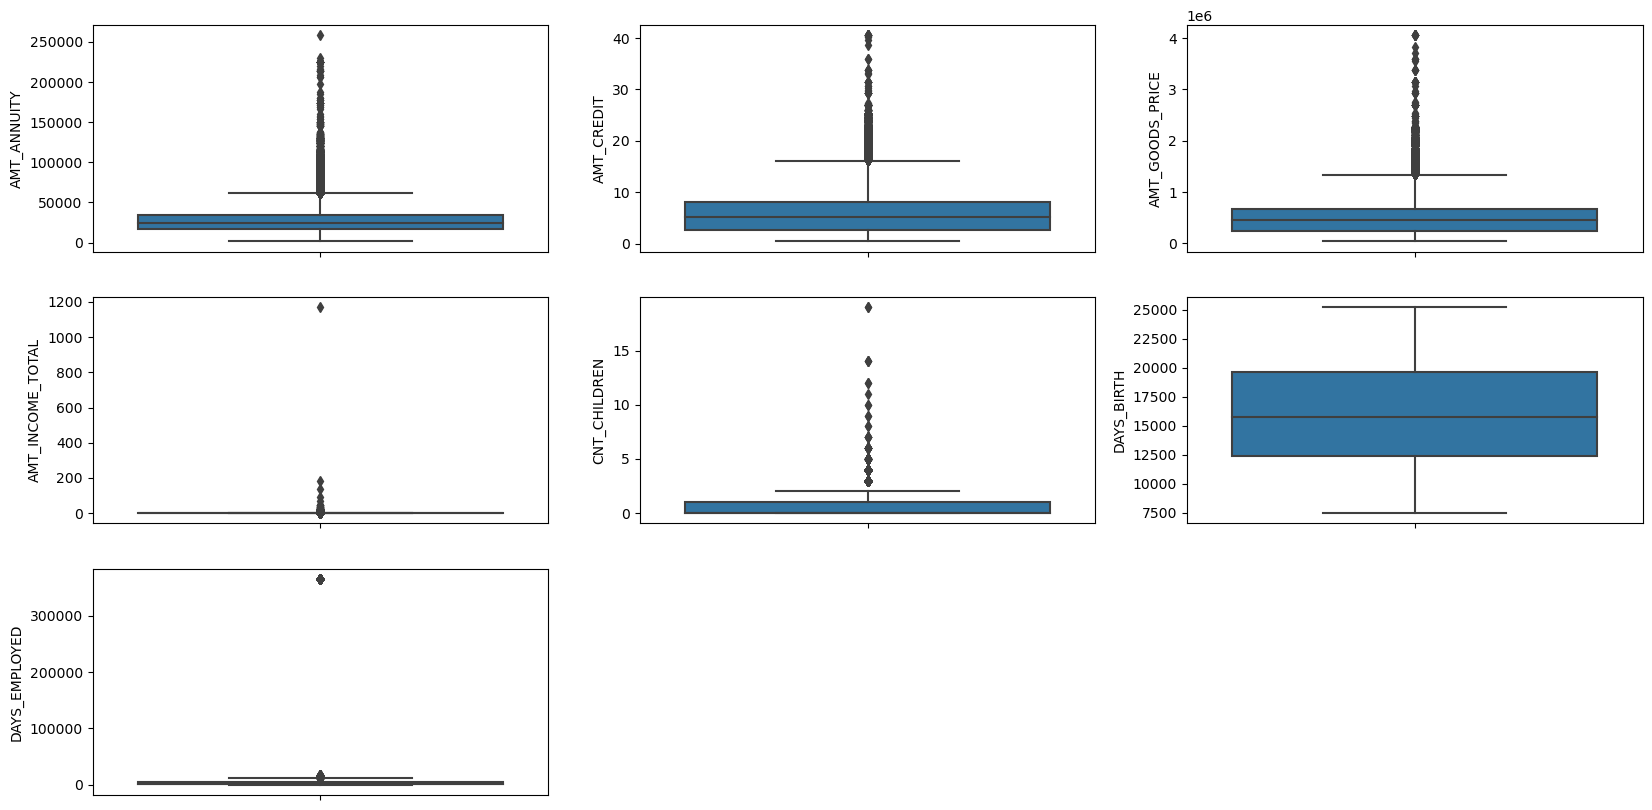

In [86]:
Outliers_col_1 = ["AMT_ANNUITY","AMT_CREDIT","AMT_GOODS_PRICE","AMOUNT_INCOME_TOTAL","CNT_CHILDREN",
                 "DAYS_BIRTH","DAYS_EMPLOYED"]
fig = plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(y="AMT_ANNUITY", data=app_df)

plt.subplot(3,3,2)
sns.boxplot(y="AMT_CREDIT", data=app_df)

plt.subplot(3,3,3)
sns.boxplot(y="AMT_GOODS_PRICE", data=app_df)

plt.subplot(3,3,4)
sns.boxplot(y="AMT_INCOME_TOTAL", data=app_df)

plt.subplot(3,3,5)
sns.boxplot(y="CNT_CHILDREN", data=app_df)

plt.subplot(3,3,6)
sns.boxplot(y="DAYS_BIRTH", data=app_df)

plt.subplot(3,3,7)
sns.boxplot(y="DAYS_EMPLOYED", data=app_df)

plt.show()


Insight:
It can be seen that in current application data
AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
DAYS_BIRTH has no outliers which means the data available is reliable.
DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

We can see the stats for these columns below as well.

In [87]:
app_df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
               'CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


Finding outlier information in pre_df

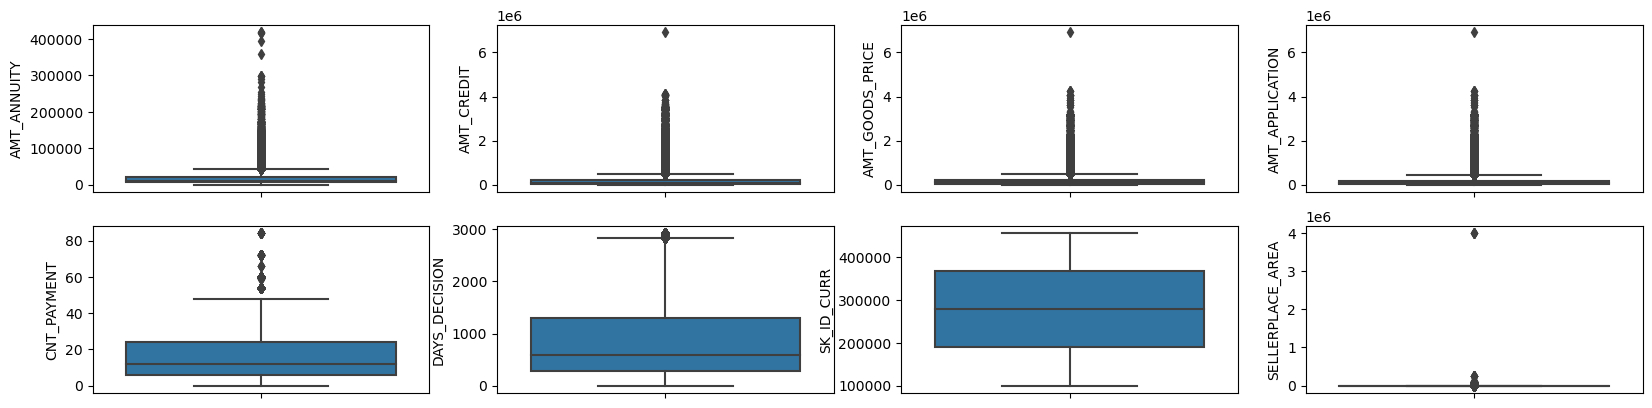

In [89]:
outliers_2 =['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA',
             'SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

fig = plt.figure(figsize=(20,10))
plt.subplot(4,4,1)
sns.boxplot(y="AMT_ANNUITY", data= pre_df)

plt.subplot(4,4,2)
sns.boxplot(y="AMT_CREDIT", data= pre_df)

plt.subplot(4,4,3)
sns.boxplot(y="AMT_GOODS_PRICE", data= pre_df)

plt.subplot(4,4,4)
sns.boxplot(y='AMT_APPLICATION', data= pre_df)

plt.subplot(4,4,5)
sns.boxplot(y="CNT_PAYMENT", data= pre_df)

plt.subplot(4,4,6)
sns.boxplot(y='DAYS_DECISION', data= pre_df)

plt.subplot(4,4,7)
sns.boxplot(y='SK_ID_CURR', data= pre_df)

plt.subplot(4,4,8)
sns.boxplot(y='SELLERPLACE_AREA', data= pre_df)

plt.show()


Insight: It can be seen that in previous application data
AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
CNT_PAYMENT has few outlier values.
SK_ID_CURR is an ID column and hence no outliers.
DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

We can see the stats for these columns below as well.

In [91]:
pre_df[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA',
             'SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,SK_ID_CURR,DAYS_DECISION,CNT_PAYMENT
count,815566.000000,1.048575e+06,1.048575e+06,8.076100e+05,1.048575e+06,1.048575e+06,1.048575e+06,815569.000000
mean,15891.265151,1.742698e+05,1.950000e+05,2.262892e+05,3.183904e+02,2.784367e+05,8.820381e+02,15.995639
std,14745.557438,2.910789e+05,3.169407e+05,3.134490e+05,7.996734e+03,1.028569e+05,7.792649e+02,14.508109
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000010e+05,2.000000e+00,0.000000
25%,6301.350000,1.890000e+04,2.427750e+04,5.058000e+04,-1.000000e+00,1.893860e+05,2.810000e+02,6.000000
50%,11250.000000,7.081650e+04,8.025300e+04,1.115116e+05,4.000000e+00,2.788100e+05,5.830000e+02,12.000000
75%,20523.003750,1.800000e+05,2.152395e+05,2.295000e+05,8.500000e+01,3.677445e+05,1.303000e+03,24.000000
max,418058.145000,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,4.562550e+05,2.922000e+03,84.000000


# Imbalance Analysis

C:\Users\Archi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


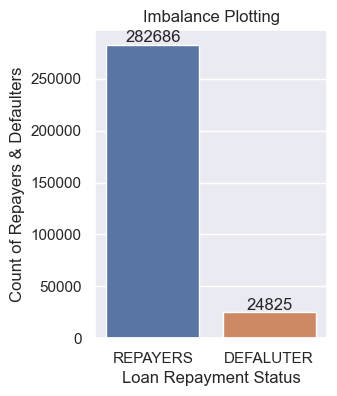

In [129]:
Imbalance = app_df['TARGET'].value_counts().reset_index()

plt.figure(figsize=(3,4))
x = ['REPAYERS','DEFALUTER']
ax=sns.barplot(x,'TARGET',data = Imbalance)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()
           

 # Segmented Univariate Analysis

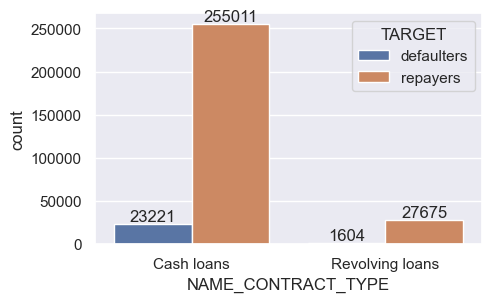

In [111]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(5,3))
sns.set(font_scale=1)
ax=sns.countplot(x='NAME_CONTRACT_TYPE',data=app_df,hue='TARGET')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()    

Inferences:
Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

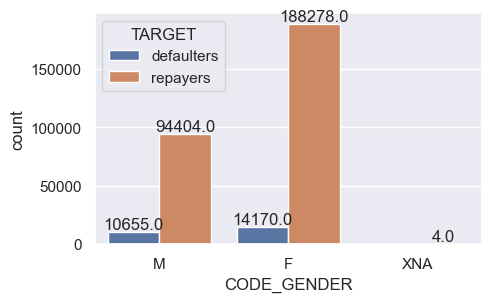

In [114]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(5,3))
sns.set(font_scale=1)
ax=sns.countplot(x='CODE_GENDER',data=app_df,hue='TARGET')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()    

Inferences:
The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%)

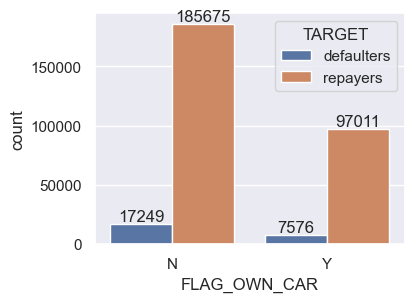

In [116]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(4,3))
sns.set(font_scale=1)
ax=sns.countplot(x='FLAG_OWN_CAR',data=app_df,hue='TARGET')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()    

Inferences:
Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

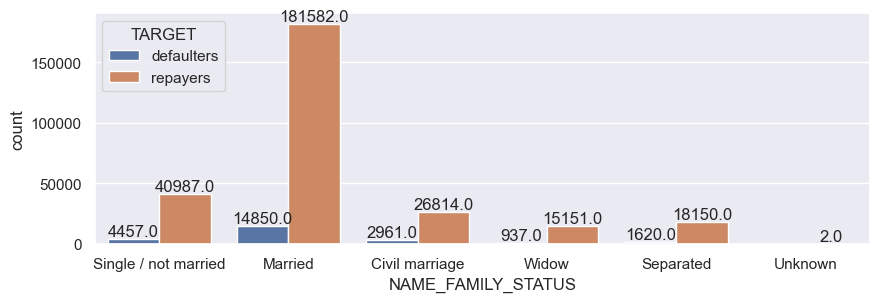

In [118]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(10,3))
sns.set(font_scale=1)
ax=sns.countplot(x='NAME_FAMILY_STATUS',data=app_df,hue='TARGET')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()    

Inferences:
Most of the people who have taken loan are married, followed by Single/not married and civil marriage
In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

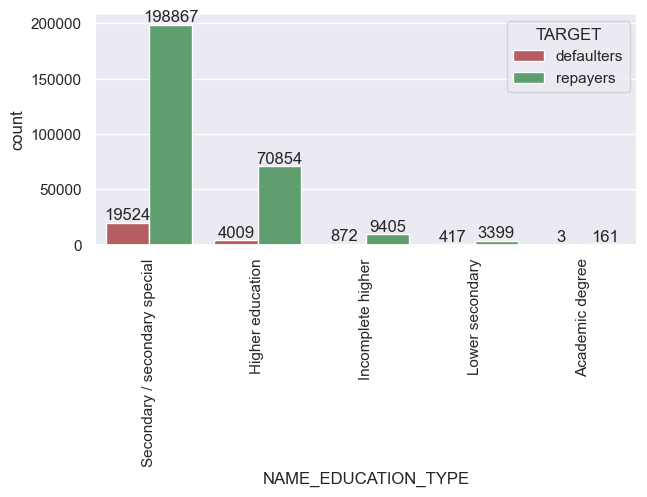

In [140]:
 app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(7,3))
sns.set(font_scale=1)
ax=sns.countplot(x='NAME_EDUCATION_TYPE',data=app_df,hue='TARGET',palette = ('r','g'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()  

Inferences:
Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.

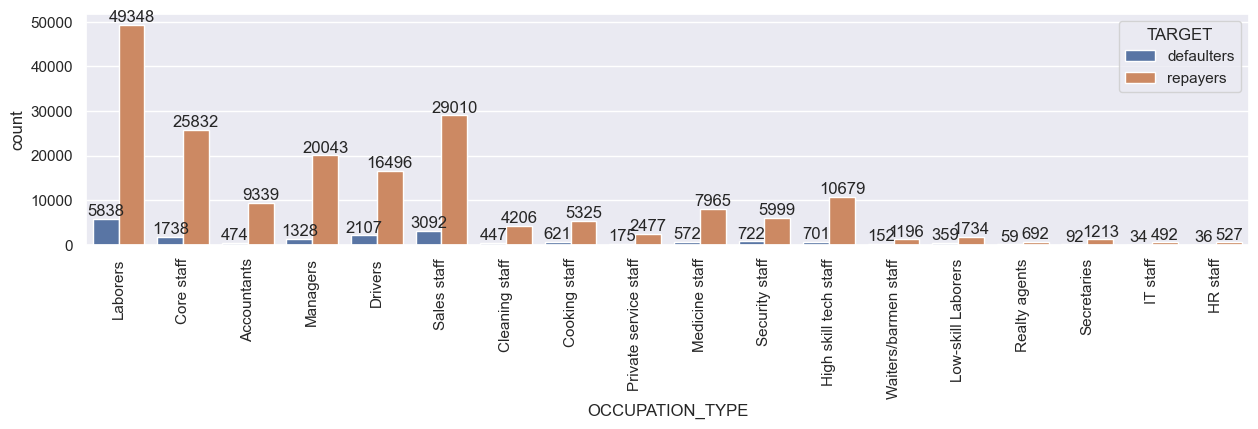

In [134]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(15,3))
sns.set(style ='whitegrid')
sns.set(font_scale=1)
ax=sns.countplot(x='OCCUPATION_TYPE',data=app_df,hue='TARGET')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()    

Inferences:
Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

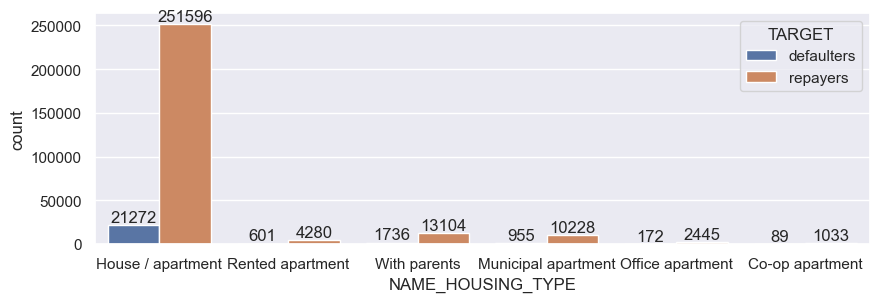

In [130]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(10,3))
sns.set(font_scale=1)
ax=sns.countplot(x="NAME_HOUSING_TYPE",data=app_df,hue='TARGET')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()    

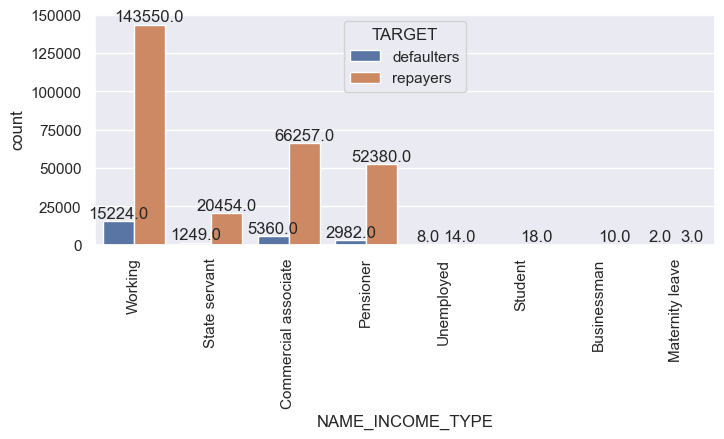

In [137]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(8,3))
sns.set(font_scale=1)
ax=sns.countplot(x="NAME_INCOME_TYPE",data=app_df,hue='TARGET')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()    

Inferences:
Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). 
The rest of types of incomes are under the average of 10% for not returning loans.
Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

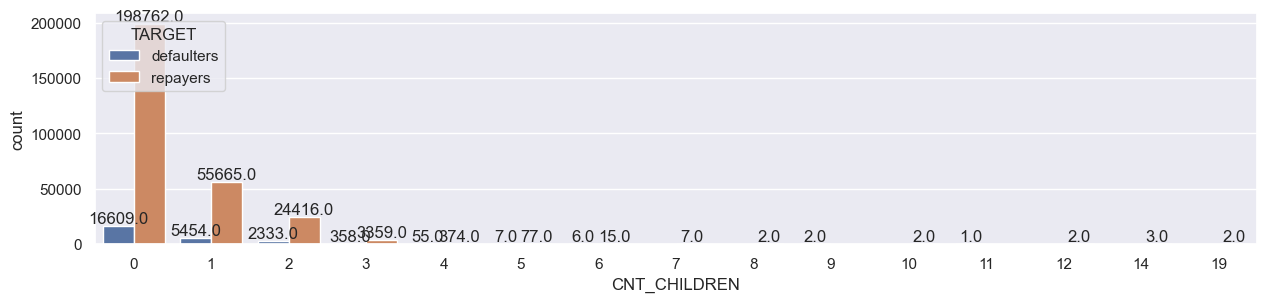

In [145]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(15,3))
sns.set(font_scale=1)
ax=sns.countplot(x="CNT_CHILDREN",data=app_df,hue='TARGET')
 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()    

Inferences:
Most of the applicants do not have children
Very few clients have more than 3 children.
Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate
 

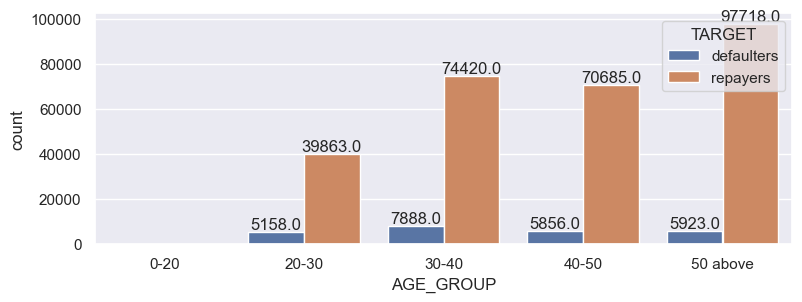

In [148]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(9,3))
sns.set(font_scale=1)
ax=sns.countplot(x="AGE_GROUP",data=app_df,hue='TARGET')
 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()  

Inferences:
People in the age group range 20-40 have higher probability of defaulting
People above age of 50 have low probability of defailting 

# Bivariate analysis

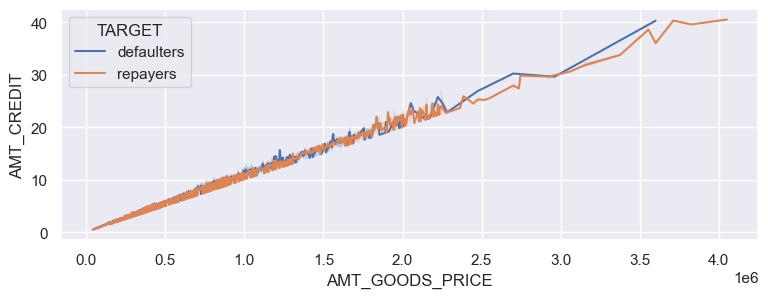

In [149]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(9,3))
sns.set(font_scale=1)
ax=sns.lineplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=app_df,hue='TARGET')
 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()  

Inferences:
When the credit amount goes beyond 3M, there is an increase in defaulters.

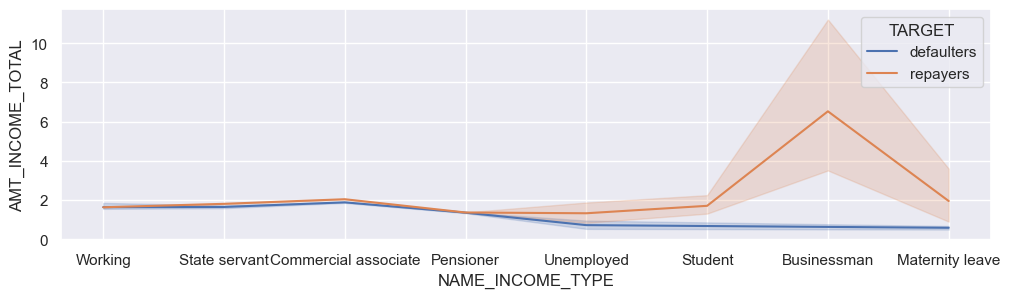

In [154]:
app_df['TARGET'] = app_df['TARGET'].replace({0: 'repayers', 1: 'defaulters'})
fig = plt.figure(figsize=(12,3))
sns.set(font_scale=1)
ax=sns.lineplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=app_df,hue='TARGET')
 
plt.show()  

Inferences:
Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.

The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

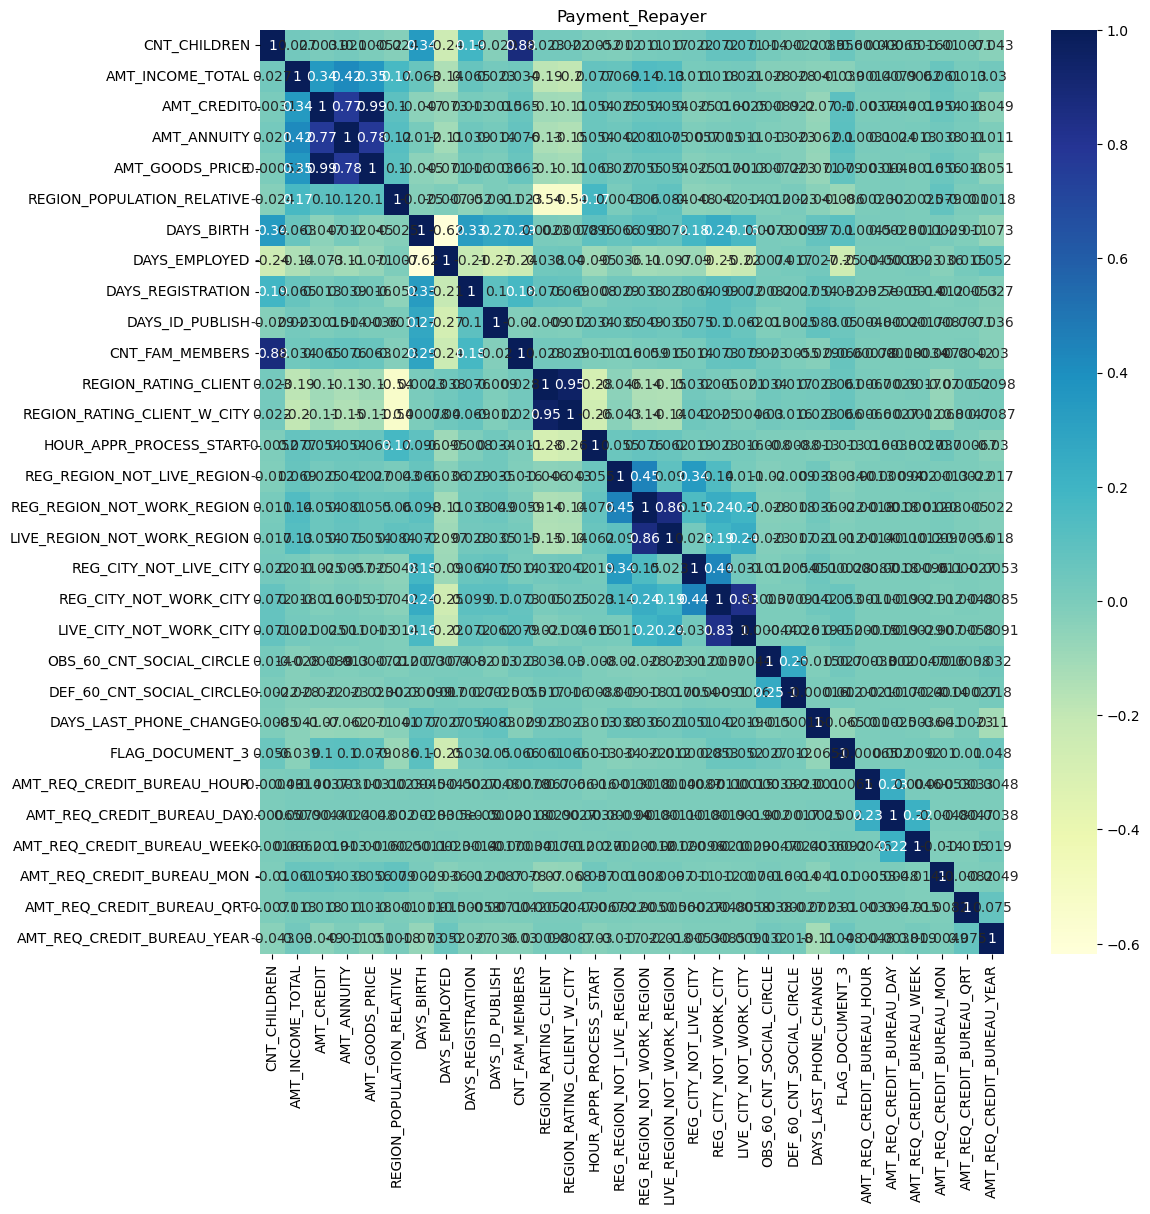

In [5]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Repayer_df = app_df.loc[app_df['TARGET']==0, cols_for_correlation] # Repayers
fig = plt.figure(figsize=(12,12))
 
sns.heatmap(Repayer_df.corr(method = 'pearson'),cmap = 'YlGnBu',
annot=True)
plt.title('Payment_Repayer')
plt.show()

Inferences:
Correlating factors amongst repayers:
Credit amount is highly correlated with
amount of goods price
loan annuity
total income
We can also see that repayers have high correlation in number of days employed.

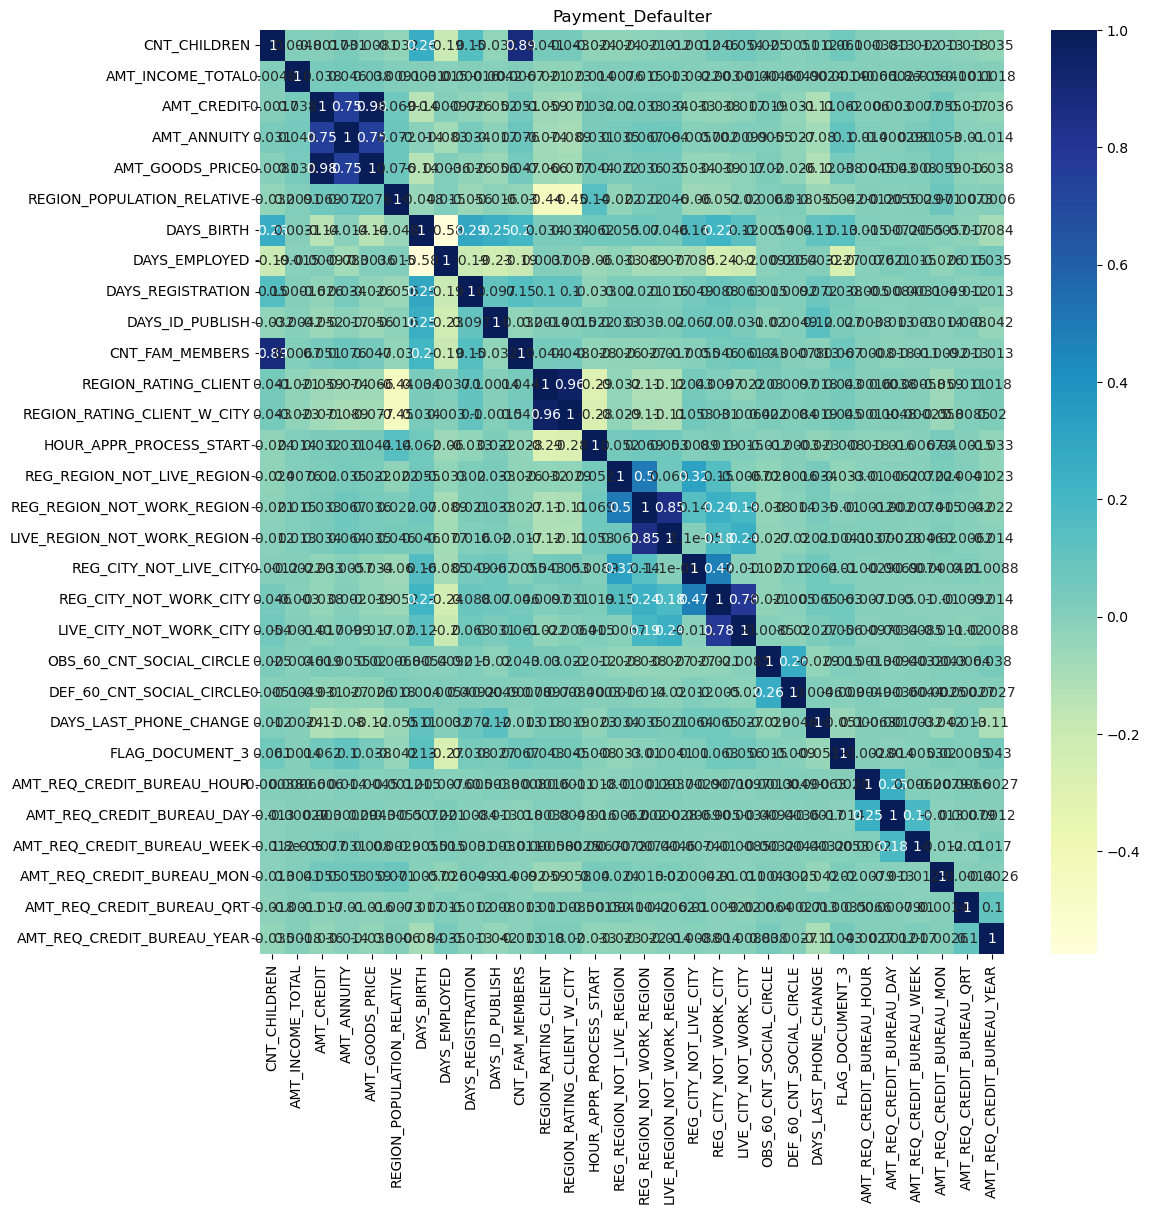

In [6]:
Defaulter_df = app_df.loc[app_df['TARGET']==1, cols_for_correlation] # Defaulters
fig = plt.figure(figsize=(12,12))
 
sns.heatmap(Defaulter_df.corr(method = 'pearson'),cmap = 'YlGnBu',
annot=True)
plt.title('Payment_Defaulter')
plt.show()


Inferences:
Credit amount is highly correlated with amount of goods price which is same as repayers.
But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

In [ ]:
Decisive Factor whether an applicant will be Repayer:
    
NAME_EDUCATION_TYPE: Academic degree has less defaults.
NAME_INCOME_TYPE: Student and Businessmen have no defaults.
DAYS_BIRTH: People above age of 50 have low probability of defaulting
DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate
AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default
CNT_CHILDREN: People with zero to two children tend to repay the loans.

Decisive Factor whether an applicant will be Defaulter:

CODE_GENDER: Men are at relatively higher default rate
NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
 